# Biological features of Orthopaedic Patients

This is a model that will help in predicting the possibility if the patient has chronic kidney disease.
There are 25 health related attributes collected.

In [1]:
# Data preprocessing libraries
import pandas as pd
import numpy as np
from scipy.stats import skew
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# data visualization
from pandas.plotting import scatter_matrix
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Deep learning models libraries
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, Input, Flatten, Conv2D, MaxPooling2D, SimpleRNN
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils, to_categorical

# Evalution measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc

In [2]:
# load the dataset
dataframe = pd.read_csv("D:\\Research Work\\Research Folder 2\\Orthopedic_patients.csv")

# print(dataframe.head())
# print(dataframe.shape)
# print(dataframe.dtypes)

In [3]:
dataframe['class'] = dataframe['class'].replace(to_replace={'Normal': 1, 'Abnormal':0})

In [4]:
dataframe.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


## Models


In [5]:
# Dividing the dataset into train and test data for model training and evaluation
X = dataframe.drop('class', axis=1)
y = dataframe['class']
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Count the number of instances for each class
class_counts_before = train_labels.value_counts()

# Print the number of samples in each class before SMOTE
print("Number of samples in each class before SMOTE on train data:", class_counts_before)

# Create an instance of SMOTE
smote = SMOTE()

# Apply SMOTE to the data
train_data, train_labels = smote.fit_resample(train_data, train_labels)

# Count the number of instances for each class
class_counts_after = train_labels.value_counts()

# Print the number of samples in each class after SMOTE
print("Number of samples in each class after SMOTE on train data:", class_counts_after)

Number of samples in each class before SMOTE on train data: 0    166
1     82
Name: class, dtype: int64
Number of samples in each class after SMOTE on train data: 0    166
1    166
Name: class, dtype: int64


In [8]:
# finding correlation between numeric features
corr_matrix = train_data.corr()
print("\n")
print(corr_matrix)
print("\n")

# finding correlation between numeric data and dependent feature
# print("\n")
for num_fea in train_data.columns:
    corr, _ = pointbiserialr(train_labels, train_data[num_fea])
    # print(f"Correlation between dependent variable and {num_fea} is {corr:.3f}")



                          pelvic_incidence  pelvic_tilt numeric  \
pelvic_incidence                  1.000000             0.651283   
pelvic_tilt numeric               0.651283             1.000000   
lumbar_lordosis_angle             0.737536             0.444149   
sacral_slope                      0.832541             0.121853   
pelvic_radius                    -0.333705            -0.103263   
degree_spondylolisthesis          0.653054             0.400746   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.737536      0.832541      -0.333705   
pelvic_tilt numeric                    0.444149      0.121853      -0.103263   
lumbar_lordosis_angle                  1.000000      0.640452      -0.104173   
sacral_slope                           0.640452      1.000000      -0.361099   
pelvic_radius                         -0.104173     -0.361099       1.000000   
degree_spondylolisthesis               0.514319 

In [9]:
# Using Z-score normalization to normalize the train data
means = np.mean(train_data, axis=0)
stds = np.std(train_data, axis=0)
normalized_df_train = (train_data - means)/stds

# Using Z-score normalization to normalize the test data
means = np.mean(test_data, axis=0)
stds = np.std(test_data, axis=0)
normalized_df_test = (test_data - means)/stds

# print(normalized_df_train.head())
# print(normalized_df_test.head())

# Machine Learning Models

In [10]:
ml_names = ['lr', 'nb', 'dt', 'svm', 'knn']
lml_names = ['LR', 'NB', 'DT', 'SVM', 'KNN']

cml_names = ['blue', 'deeppink', 'crimson', 'aqua', 'gold']
cml_names.append('brown')

### 1. Logistic Regression

In [11]:
# Fit logistic regression model
model_lr = LogisticRegression(solver='lbfgs', max_iter=1000)
model_lr.fit(train_data, train_labels)

LogisticRegression(max_iter=1000)

### 2. Naive Bayes

In [12]:
# Fit Gaussian Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(train_data, train_labels)

GaussianNB()

### 3. Decision Tree

In [13]:
# Fit Decision Tree model
model_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
model_dt.fit(train_data, train_labels)

DecisionTreeClassifier(max_depth=3, random_state=42)

### 4. Support Vector Machines

In [14]:
# Fit Support Vector Machine Classifier (SVM) model
model_svm = SVC(kernel='linear', C=1, random_state=42, probability=True)
model_svm.fit(train_data, train_labels)

SVC(C=1, kernel='linear', probability=True, random_state=42)

### 5. K-Nearest Neighbors

In [15]:
# Fit K-Nearest Neighbors model
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(train_data, train_labels)

KNeighborsClassifier(n_neighbors=10)

# Ensemble Learning models

In [16]:
em_names = ['rf', 'bagging', 'xgb', 'ada', 'cb', 'gb', 'stacking', "vh", "vs", "blend"]
lem_names = ['RF', 'Bagging','XGBoost', 'Adaboost', 'Catboost', 'GradientBoost', 'Stacking', "Voting Hard", "Voting Soft", "Blending"]

cem_names = ['darkgreen', 'maroon', 'mediumblue', 'goldenrod', 'fuchsia', 'saddlebrown', 'teal', "cyan", "red", "yellow"]

# Create a list of the models to be ensembled
em_models = [('lr', model_lr), ('nb', model_nb), ('dt', model_dt), ('svm', model_svm), ('knn', model_knn)]

### 1. Random Forest

In [17]:
# Fit Random forest model
model_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model_rf.fit(train_data, train_labels)

RandomForestClassifier(max_depth=3, random_state=42)

### 2. Bagging

In [18]:
# Aggregate the predictions made by each BaggingClassifier
y_preds = []
for name, model in em_models:
    # Create a BaggingClassifier object for the current model
    bagging_model = BaggingClassifier(model, n_estimators=10, max_samples=0.8, random_state=42)
    
    # Train the BaggingClassifier on the training set
    bagging_model.fit(train_data, train_labels)

    # Make predictions on the testing set
    y_pred = bagging_model.predict_proba(test_data)[:, 1]
    
    # Append the predicted probabilities to the list of predictions
    y_preds.append(y_pred)

# Aggregate the predictions using weighted voting
weights = [0.2, 0.2, 0.2, 0.2, 0.2]
model_bagging = np.average(y_preds, axis=0, weights=weights)

### 3. XGBoost

In [20]:
# Fit XGboost model
model_xgb = xgb.XGBClassifier()
model_xgb.fit(train_data, train_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### 4. Adaboost

In [21]:
# Create an AdaBoost classifier with 50 estimators
model_ada = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the AdaBoost classifier to the training data
model_ada.fit(train_data,train_labels)

AdaBoostClassifier(random_state=42)

### 5. Catboost

In [22]:
# Create an instance of the CatBoostClassifier
model_cb = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

# Fit the model on the training data
model_cb.fit(train_data, train_labels)

0:	learn: 0.6541336	total: 142ms	remaining: 14s
1:	learn: 0.6203307	total: 144ms	remaining: 7.05s
2:	learn: 0.5903839	total: 147ms	remaining: 4.75s
3:	learn: 0.5631315	total: 150ms	remaining: 3.6s
4:	learn: 0.5400659	total: 153ms	remaining: 2.9s
5:	learn: 0.5163380	total: 155ms	remaining: 2.43s
6:	learn: 0.4974564	total: 158ms	remaining: 2.09s
7:	learn: 0.4800777	total: 161ms	remaining: 1.85s
8:	learn: 0.4666296	total: 163ms	remaining: 1.65s
9:	learn: 0.4481335	total: 166ms	remaining: 1.5s
10:	learn: 0.4345668	total: 169ms	remaining: 1.37s
11:	learn: 0.4210660	total: 171ms	remaining: 1.26s
12:	learn: 0.4095332	total: 174ms	remaining: 1.16s
13:	learn: 0.3974652	total: 177ms	remaining: 1.09s
14:	learn: 0.3874277	total: 180ms	remaining: 1.02s
15:	learn: 0.3780820	total: 183ms	remaining: 960ms
16:	learn: 0.3691514	total: 185ms	remaining: 905ms
17:	learn: 0.3611388	total: 188ms	remaining: 855ms
18:	learn: 0.3522390	total: 190ms	remaining: 811ms
19:	learn: 0.3447814	total: 194ms	remaining: 7

### 6. Gradient Boosting

In [23]:
# Create a Gradient Boosting Classifier object
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting Classifier on the training set
model_gb.fit(train_data, train_labels)

GradientBoostingClassifier(random_state=42)

### 7. Stacking

In [24]:
model_stacking = StackingClassifier(estimators=em_models, final_estimator=LogisticRegression())

# Fit the stacking model on the training data
model_stacking.fit(train_data, train_labels)

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('nb', GaussianNB()),
                               ('dt',
                                DecisionTreeClassifier(max_depth=3,
                                                       random_state=42)),
                               ('svm',
                                SVC(C=1, kernel='linear', probability=True,
                                    random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10))],
                   final_estimator=LogisticRegression())

### 8. Voting [Hard]

In [25]:
# Define the voting classifier with hard voting
model_vh = VotingClassifier(estimators=em_models, voting='hard')

# Fit the models on the training data
model_vh.fit(train_data, train_labels)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('nb', GaussianNB()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42)),
                             ('svm',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=10))])

### 9. Voting [Soft]

In [26]:
# Define the voting classifier with soft voting
model_vs = VotingClassifier(estimators=em_models, voting='soft')

# Fit the models on the training data
model_vs.fit(train_data, train_labels)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('nb', GaussianNB()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42)),
                             ('svm',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=10))],
                 voting='soft')

### 10. Blending

In [27]:
# Splitting the train data into train and val set
train_set, val_set, train_set_labels, val_set_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=0)

In [28]:
base_predictions = []
meta_predictions = []

for name, model in em_models:
    model.fit(train_set, train_set_labels)
    base_prediction = model.predict(val_set)
    meta_prediction = model.predict(test_data)
    
    base_prediction = base_prediction.reshape(len(base_prediction), 1)
    meta_prediction = meta_prediction.reshape(len(meta_prediction), 1)
    
    base_predictions.append(base_prediction)
    meta_predictions.append(meta_prediction)

base_predictions = np.hstack(base_predictions)
meta_predictions = np.hstack(meta_predictions)

model_blend = LogisticRegression()
model_blend.fit(base_predictions, val_set_labels)

LogisticRegression()

# Deep Learning Models

In [29]:
dl_names = ["ann", "mlp", "rnn", "lstm", "gru"]
ldl_names = ["ANN", "MLP", "SimpleRNN", "LSTM", "GRU"]

cdl_names = ["lime", "darkblue", "red", "chocolate", "darkorange"]

In [30]:
# Reshape the features to 2D tensor shape (batch_size, num_features)
train_features = train_data.values
test_features = test_data.values

### 1. ANN

In [31]:
# Define the model architecture
model_ann = Sequential()
model_ann.add(Dense(15, input_dim=train_features.shape[1], activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(15, activation='relu'))
model_ann.add(Dropout(0.4))
model_ann.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_ann.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=20, verbose=1)

Epoch 1/100
17/17 [==============================] - 3s 31ms/step - loss: 7.9596 - accuracy: 0.4217 - val_loss: 2.1579 - val_accuracy: 0.7097
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 5.4002 - accuracy: 0.4669 - val_loss: 1.0294 - val_accuracy: 0.6935
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 3.8256 - accuracy: 0.5060 - val_loss: 0.6933 - val_accuracy: 0.6613
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 2.8805 - accuracy: 0.5512 - val_loss: 0.7593 - val_accuracy: 0.7581
Epoch 5/100
17/17 [==============================] - 0s 7ms/step - loss: 2.4195 - accuracy: 0.5633 - val_loss: 0.7206 - val_accuracy: 0.7581
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 1.7881 - accuracy: 0.6205 - val_loss: 0.6989 - val_accuracy: 0.7419
Epoch 7/100
17/17 [==============================] - 0s 7ms/step - loss: 1.8726 - accuracy: 0.5964 - val_loss: 0.6853 - val_accuracy: 0.7419
Epoch 8/100


### 2. MLP

In [32]:
# Create an MLP classifier with two hidden layers of 50 neurons each
model_mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

# Train the MLP classifier on the training set
model_mlp.fit(train_data, train_labels)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [33]:
# Reshape the features to 3D tensor shape (batch_size, time_steps, num_features)
train_features = train_features.reshape(-1, 1, train_features.shape[1])
test_features = test_features.reshape(-1, 1, test_features.shape[1])

### 3. Simple RNN

In [34]:
# Define the model architecture
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, input_shape=(train_features.shape[1], train_features.shape[2]), return_sequences=True))
model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_rnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_rnn.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=20)

Epoch 1/100
17/17 [==============================] - 5s 60ms/step - loss: 0.6048 - accuracy: 0.6506 - val_loss: 0.4355 - val_accuracy: 0.8065
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 0.5033 - accuracy: 0.7380 - val_loss: 0.4160 - val_accuracy: 0.8065
Epoch 3/100
17/17 [==============================] - 0s 10ms/step - loss: 0.4390 - accuracy: 0.8102 - val_loss: 0.3959 - val_accuracy: 0.8065
Epoch 4/100
17/17 [==============================] - 0s 9ms/step - loss: 0.4709 - accuracy: 0.7922 - val_loss: 0.3765 - val_accuracy: 0.7903
Epoch 5/100
17/17 [==============================] - 0s 7ms/step - loss: 0.4276 - accuracy: 0.8012 - val_loss: 0.3821 - val_accuracy: 0.7903
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 0.3917 - accuracy: 0.8253 - val_loss: 0.3903 - val_accuracy: 0.7903
Epoch 7/100
17/17 [==============================] - 0s 7ms/step - loss: 0.3795 - accuracy: 0.8253 - val_loss: 0.3798 - val_accuracy: 0.8226
Epoch 8/100

### 4. LSTM

In [35]:
# Define the model architecture
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(train_features.shape[1], train_features.shape[2]), return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=20)

Epoch 1/100
17/17 [==============================] - 11s 123ms/step - loss: 0.6534 - accuracy: 0.7319 - val_loss: 0.6436 - val_accuracy: 0.8065
Epoch 2/100
17/17 [==============================] - 0s 18ms/step - loss: 0.5911 - accuracy: 0.7952 - val_loss: 0.5523 - val_accuracy: 0.7903
Epoch 3/100
17/17 [==============================] - 0s 12ms/step - loss: 0.5017 - accuracy: 0.8072 - val_loss: 0.4581 - val_accuracy: 0.7903
Epoch 4/100
17/17 [==============================] - 0s 12ms/step - loss: 0.4267 - accuracy: 0.8253 - val_loss: 0.4175 - val_accuracy: 0.7903
Epoch 5/100
17/17 [==============================] - 0s 12ms/step - loss: 0.3854 - accuracy: 0.8434 - val_loss: 0.3687 - val_accuracy: 0.8226
Epoch 6/100
17/17 [==============================] - 0s 12ms/step - loss: 0.3561 - accuracy: 0.8464 - val_loss: 0.3567 - val_accuracy: 0.7903
Epoch 7/100
17/17 [==============================] - 0s 17ms/step - loss: 0.3620 - accuracy: 0.8434 - val_loss: 0.3540 - val_accuracy: 0.8387
Epoc

### 5. GRU

In [36]:
# Define the model architecture
model_gru = Sequential()
model_gru.add(GRU(64, input_shape=(train_features.shape[1], train_features.shape[2]), return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(32))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_gru.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_gru.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=20)

Epoch 1/100
17/17 [==============================] - 11s 112ms/step - loss: 0.6283 - accuracy: 0.6807 - val_loss: 0.5205 - val_accuracy: 0.7742
Epoch 2/100
17/17 [==============================] - 0s 11ms/step - loss: 0.5071 - accuracy: 0.7831 - val_loss: 0.4430 - val_accuracy: 0.7903
Epoch 3/100
17/17 [==============================] - 0s 20ms/step - loss: 0.4491 - accuracy: 0.7982 - val_loss: 0.4338 - val_accuracy: 0.7903
Epoch 4/100
17/17 [==============================] - 0s 13ms/step - loss: 0.4231 - accuracy: 0.8102 - val_loss: 0.3840 - val_accuracy: 0.8065
Epoch 5/100
17/17 [==============================] - 0s 12ms/step - loss: 0.3893 - accuracy: 0.8253 - val_loss: 0.4038 - val_accuracy: 0.7742
Epoch 6/100
17/17 [==============================] - 0s 11ms/step - loss: 0.3802 - accuracy: 0.7982 - val_loss: 0.3755 - val_accuracy: 0.7903
Epoch 7/100
17/17 [==============================] - 0s 11ms/step - loss: 0.3687 - accuracy: 0.8343 - val_loss: 0.3623 - val_accuracy: 0.8065
Epoc

# Evalution metrics with ROC-AUC plot [individual]

Confusion matrix of the model LR : 
[[38  6]
 [ 2 16]]
True Negative of the model LR -> 38
False Positive of the model LR -> 6
False Negative of the model LR -> 2
True Positive of the model LR -> 16
Accuracy of the model LR -> 0.8709677419354839
Misclassification rate of the model LR -> 0.12903225806451613
Precision of the model LR -> 0.7272727272727273
Recall of the model LR -> 0.8888888888888888
F1 Measure of the model LR -> 0.7999999999999999
AUC of the model LR -> 0.9356060606060606




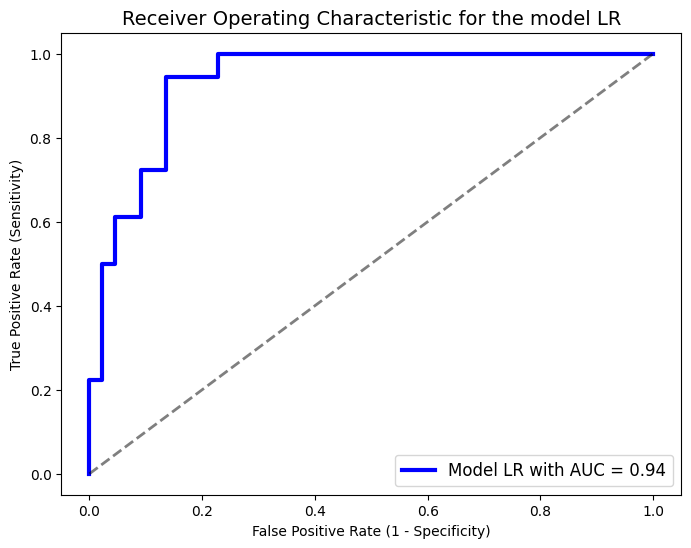

Confusion matrix of the model NB : 
[[34 10]
 [ 1 17]]
True Negative of the model NB -> 34
False Positive of the model NB -> 10
False Negative of the model NB -> 1
True Positive of the model NB -> 17
Accuracy of the model NB -> 0.8225806451612904
Misclassification rate of the model NB -> 0.17741935483870963
Precision of the model NB -> 0.6296296296296297
Recall of the model NB -> 0.9444444444444444
F1 Measure of the model NB -> 0.7555555555555556
AUC of the model NB -> 0.8396464646464645




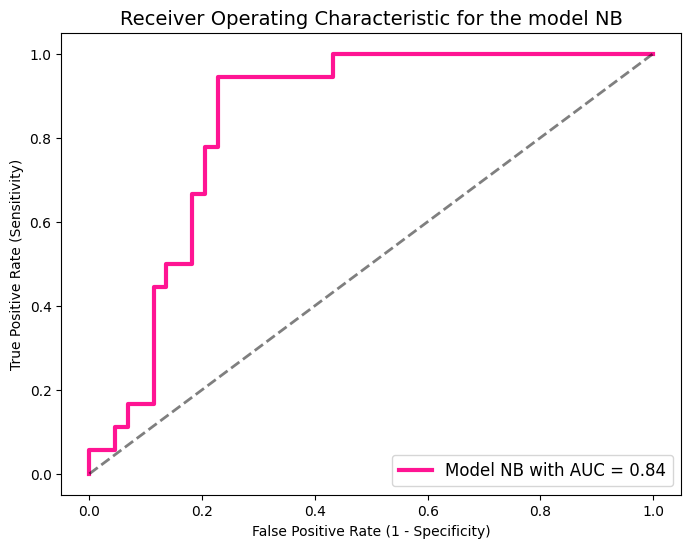

Confusion matrix of the model DT : 
[[38  6]
 [ 5 13]]
True Negative of the model DT -> 38
False Positive of the model DT -> 6
False Negative of the model DT -> 5
True Positive of the model DT -> 13
Accuracy of the model DT -> 0.8225806451612904
Misclassification rate of the model DT -> 0.17741935483870963
Precision of the model DT -> 0.6842105263157895
Recall of the model DT -> 0.7222222222222222
F1 Measure of the model DT -> 0.7027027027027027
AUC of the model DT -> 0.8630050505050505




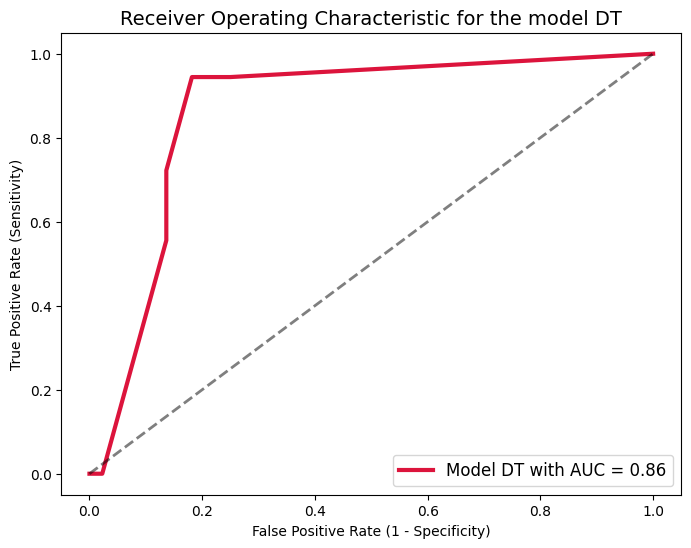

Confusion matrix of the model SVM : 
[[37  7]
 [ 2 16]]
True Negative of the model SVM -> 37
False Positive of the model SVM -> 7
False Negative of the model SVM -> 2
True Positive of the model SVM -> 16
Accuracy of the model SVM -> 0.8548387096774194
Misclassification rate of the model SVM -> 0.14516129032258063
Precision of the model SVM -> 0.6956521739130435
Recall of the model SVM -> 0.8888888888888888
F1 Measure of the model SVM -> 0.7804878048780488
AUC of the model SVM -> 0.9469696969696969




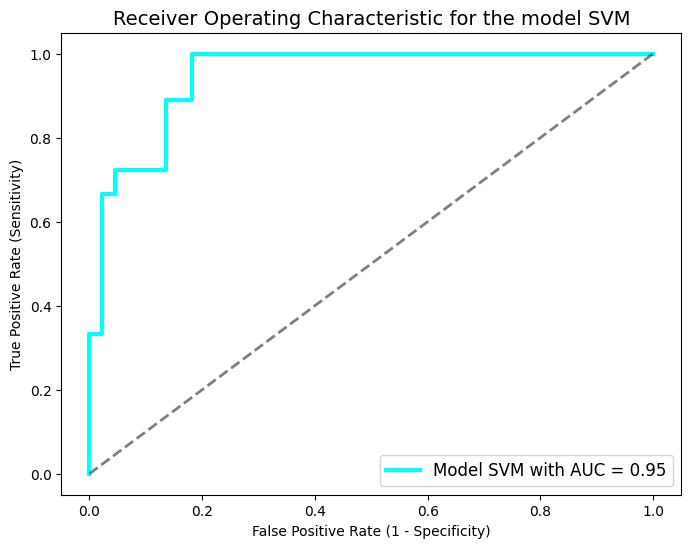

Confusion matrix of the model KNN : 
[[37  7]
 [ 3 15]]
True Negative of the model KNN -> 37
False Positive of the model KNN -> 7
False Negative of the model KNN -> 3
True Positive of the model KNN -> 15
Accuracy of the model KNN -> 0.8387096774193549
Misclassification rate of the model KNN -> 0.16129032258064513
Precision of the model KNN -> 0.6818181818181818
Recall of the model KNN -> 0.8333333333333334
F1 Measure of the model KNN -> 0.7499999999999999
AUC of the model KNN -> 0.8983585858585859




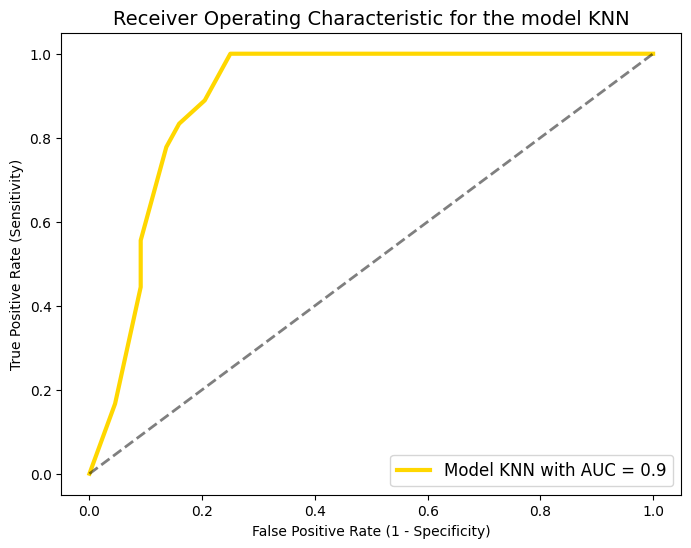

Confusion matrix of the model RF : 
[[35  9]
 [ 5 13]]
True Negative of the model RF -> 35
False Positive of the model RF -> 9
False Negative of the model RF -> 5
True Positive of the model RF -> 13
Accuracy of the model RF -> 0.7741935483870968
Misclassification rate of the model RF -> 0.22580645161290325
Precision of the model RF -> 0.5909090909090909
Recall of the model RF -> 0.7222222222222222
F1 Measure of the model RF -> 0.65
AUC of the model RF -> 0.8724747474747474




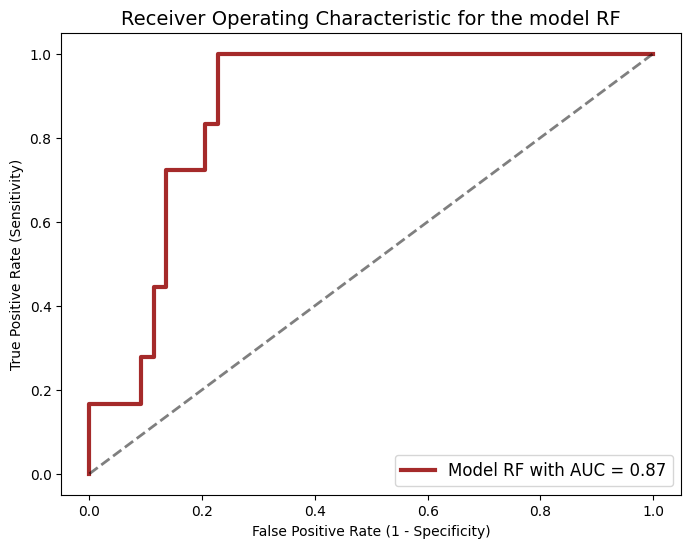

Confusion matrix of the model Bagging : 
[[35  9]
 [ 1 17]]
True Negative of the model Bagging -> 35
False Positive of the model Bagging -> 9
False Negative of the model Bagging -> 1
True Positive of the model Bagging -> 17
Accuracy of the model Bagging -> 0.8387096774193549
Misclassification rate of the model Bagging -> 0.16129032258064513
Precision of the model Bagging -> 0.6538461538461539
Recall of the model Bagging -> 0.9444444444444444
F1 Measure of the model Bagging -> 0.7727272727272727
AUC of the model Bagging -> 0.8699494949494949




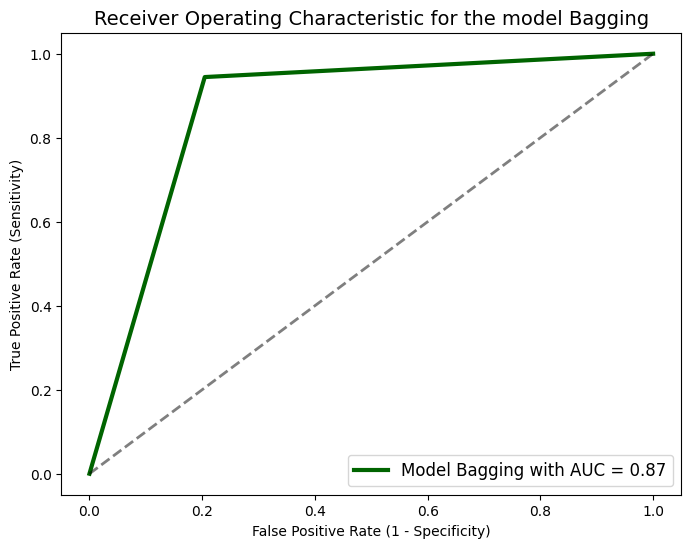

Confusion matrix of the model XGBoost : 
[[39  5]
 [ 4 14]]
True Negative of the model XGBoost -> 39
False Positive of the model XGBoost -> 5
False Negative of the model XGBoost -> 4
True Positive of the model XGBoost -> 14
Accuracy of the model XGBoost -> 0.8548387096774194
Misclassification rate of the model XGBoost -> 0.14516129032258063
Precision of the model XGBoost -> 0.7368421052631579
Recall of the model XGBoost -> 0.7777777777777778
F1 Measure of the model XGBoost -> 0.7567567567567567
AUC of the model XGBoost -> 0.9103535353535354




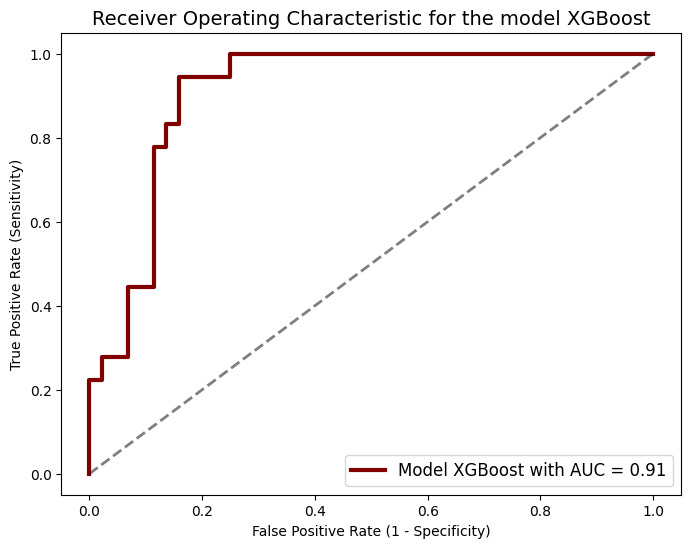

Confusion matrix of the model Adaboost : 
[[37  7]
 [ 7 11]]
True Negative of the model Adaboost -> 37
False Positive of the model Adaboost -> 7
False Negative of the model Adaboost -> 7
True Positive of the model Adaboost -> 11
Accuracy of the model Adaboost -> 0.7741935483870968
Misclassification rate of the model Adaboost -> 0.22580645161290325
Precision of the model Adaboost -> 0.6111111111111112
Recall of the model Adaboost -> 0.6111111111111112
F1 Measure of the model Adaboost -> 0.6111111111111112
AUC of the model Adaboost -> 0.869949494949495




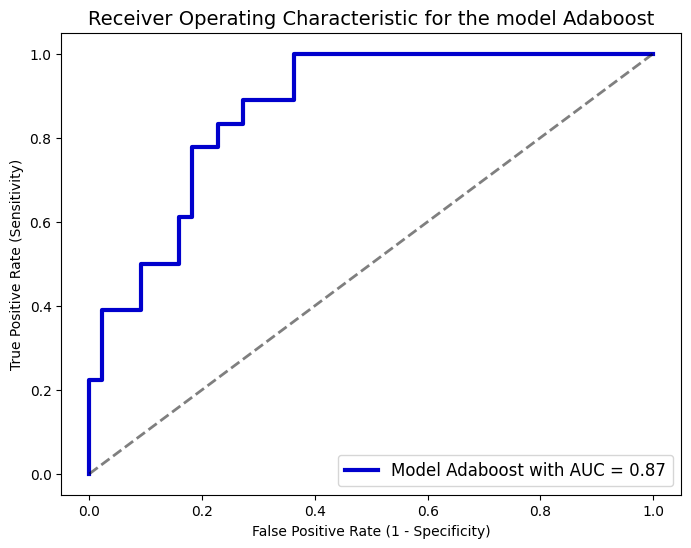

Confusion matrix of the model Catboost : 
[[38  6]
 [ 5 13]]
True Negative of the model Catboost -> 38
False Positive of the model Catboost -> 6
False Negative of the model Catboost -> 5
True Positive of the model Catboost -> 13
Accuracy of the model Catboost -> 0.8225806451612904
Misclassification rate of the model Catboost -> 0.17741935483870963
Precision of the model Catboost -> 0.6842105263157895
Recall of the model Catboost -> 0.7222222222222222
F1 Measure of the model Catboost -> 0.7027027027027027
AUC of the model Catboost -> 0.9040404040404041




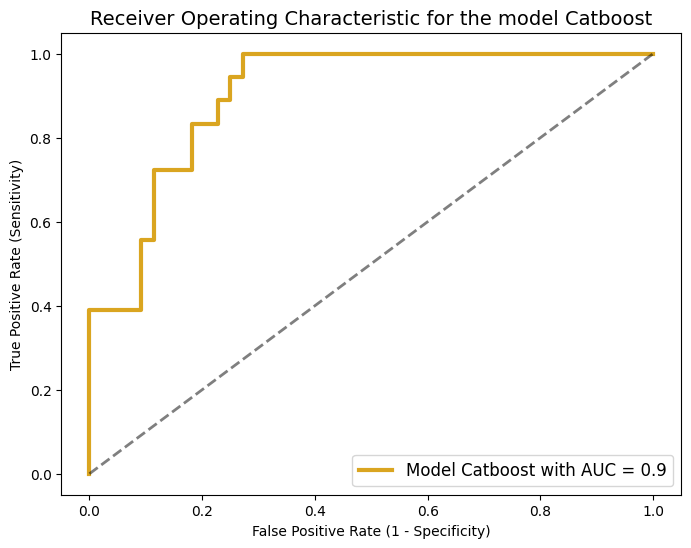

Confusion matrix of the model GradientBoost : 
[[38  6]
 [ 6 12]]
True Negative of the model GradientBoost -> 38
False Positive of the model GradientBoost -> 6
False Negative of the model GradientBoost -> 6
True Positive of the model GradientBoost -> 12
Accuracy of the model GradientBoost -> 0.8064516129032258
Misclassification rate of the model GradientBoost -> 0.19354838709677424
Precision of the model GradientBoost -> 0.6666666666666666
Recall of the model GradientBoost -> 0.6666666666666666
F1 Measure of the model GradientBoost -> 0.6666666666666666
AUC of the model GradientBoost -> 0.8939393939393939




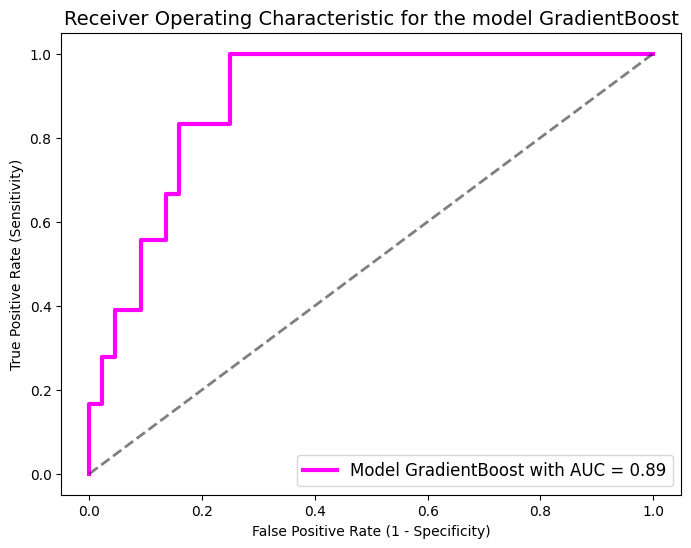

Confusion matrix of the model Stacking : 
[[38  6]
 [ 2 16]]
True Negative of the model Stacking -> 38
False Positive of the model Stacking -> 6
False Negative of the model Stacking -> 2
True Positive of the model Stacking -> 16
Accuracy of the model Stacking -> 0.8709677419354839
Misclassification rate of the model Stacking -> 0.12903225806451613
Precision of the model Stacking -> 0.7272727272727273
Recall of the model Stacking -> 0.8888888888888888
F1 Measure of the model Stacking -> 0.7999999999999999
AUC of the model Stacking -> 0.9381313131313131




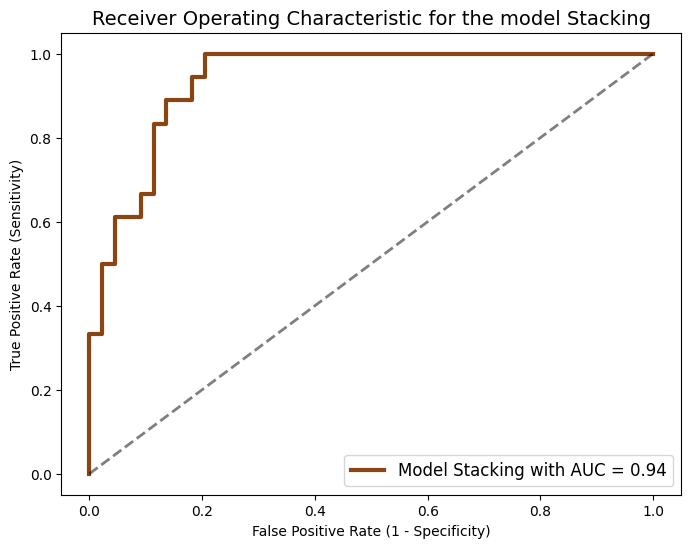

Confusion matrix of the model Voting Hard : 
[[37  7]
 [ 2 16]]
True Negative of the model Voting Hard -> 37
False Positive of the model Voting Hard -> 7
False Negative of the model Voting Hard -> 2
True Positive of the model Voting Hard -> 16
Accuracy of the model Voting Hard -> 0.8548387096774194
Misclassification rate of the model Voting Hard -> 0.14516129032258063
Precision of the model Voting Hard -> 0.6956521739130435
Recall of the model Voting Hard -> 0.8888888888888888
F1 Measure of the model Voting Hard -> 0.7804878048780488
AUC of the model Voting Hard -> 0.86489898989899




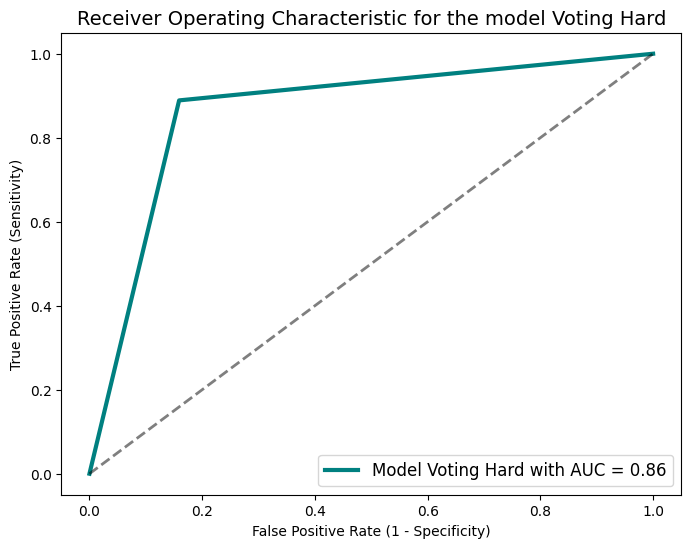

Confusion matrix of the model Voting Soft : 
[[37  7]
 [ 1 17]]
True Negative of the model Voting Soft -> 37
False Positive of the model Voting Soft -> 7
False Negative of the model Voting Soft -> 1
True Positive of the model Voting Soft -> 17
Accuracy of the model Voting Soft -> 0.8709677419354839
Misclassification rate of the model Voting Soft -> 0.12903225806451613
Precision of the model Voting Soft -> 0.7083333333333334
Recall of the model Voting Soft -> 0.9444444444444444
F1 Measure of the model Voting Soft -> 0.8095238095238096
AUC of the model Voting Soft -> 0.9242424242424242




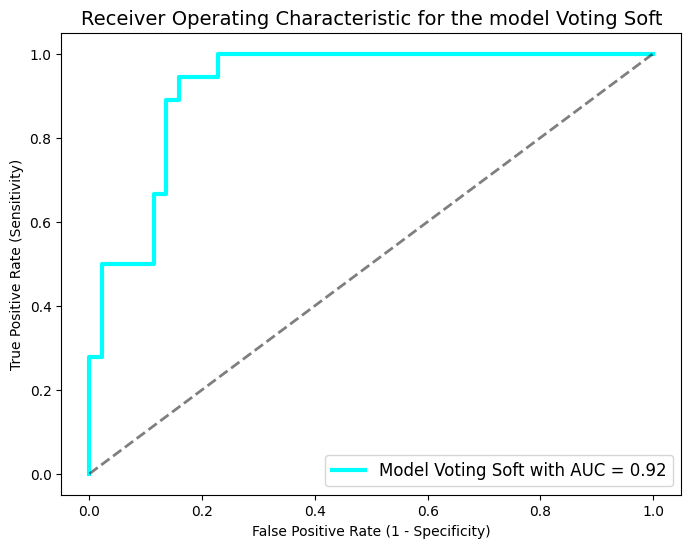

Confusion matrix of the model Blending : 
[[37  7]
 [ 1 17]]
True Negative of the model Blending -> 37
False Positive of the model Blending -> 7
False Negative of the model Blending -> 1
True Positive of the model Blending -> 17
Accuracy of the model Blending -> 0.8709677419354839
Misclassification rate of the model Blending -> 0.12903225806451613
Precision of the model Blending -> 0.7083333333333334
Recall of the model Blending -> 0.9444444444444444
F1 Measure of the model Blending -> 0.8095238095238096
AUC of the model Blending -> 0.9191919191919192




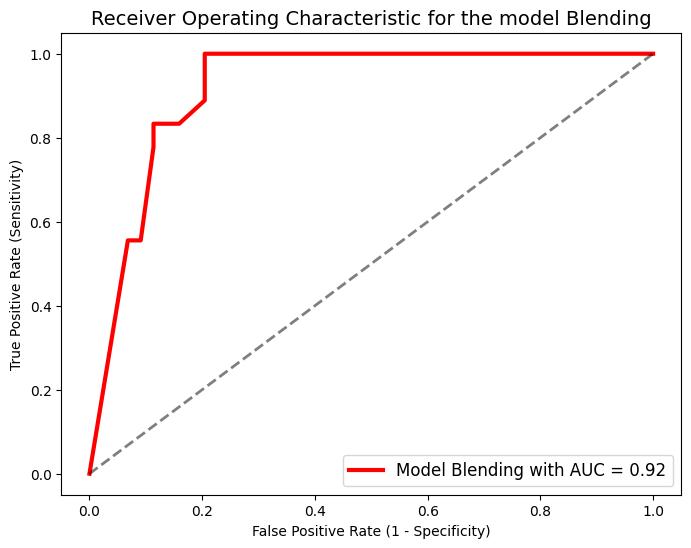

2/2 [==============================] - 0s 4ms/step
Confusion matrix of the model ANN : 
[[33 11]
 [ 2 16]]
True Negative of the model ANN -> 33
False Positive of the model ANN -> 11
False Negative of the model ANN -> 2
True Positive of the model ANN -> 16
Accuracy of the model ANN -> 0.7903225806451613
Misclassification rate of the model ANN -> 0.20967741935483875
Precision of the model ANN -> 0.5925925925925926
Recall of the model ANN -> 0.8888888888888888
F1 Measure of the model ANN -> 0.711111111111111
AUC of the model ANN -> 0.8194444444444444




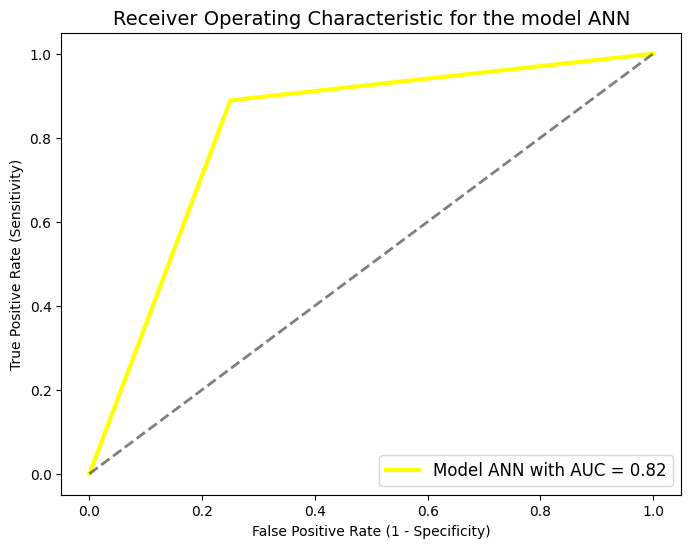

Confusion matrix of the model MLP : 
[[39  5]
 [ 7 11]]
True Negative of the model MLP -> 39
False Positive of the model MLP -> 5
False Negative of the model MLP -> 7
True Positive of the model MLP -> 11
Accuracy of the model MLP -> 0.8064516129032258
Misclassification rate of the model MLP -> 0.19354838709677424
Precision of the model MLP -> 0.6875
Recall of the model MLP -> 0.6111111111111112
F1 Measure of the model MLP -> 0.6470588235294118
AUC of the model MLP -> 0.8712121212121213




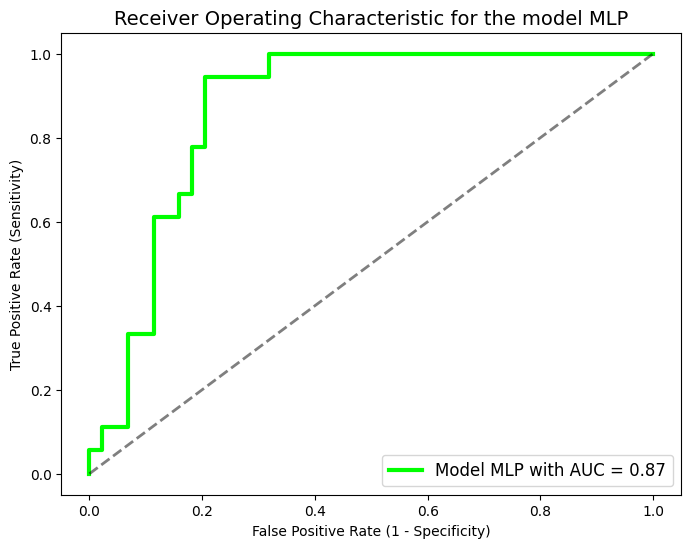

2/2 [==============================] - 1s 8ms/step
Confusion matrix of the model SimpleRNN : 
[[37  7]
 [ 6 12]]
True Negative of the model SimpleRNN -> 37
False Positive of the model SimpleRNN -> 7
False Negative of the model SimpleRNN -> 6
True Positive of the model SimpleRNN -> 12
Accuracy of the model SimpleRNN -> 0.7903225806451613
Misclassification rate of the model SimpleRNN -> 0.20967741935483875
Precision of the model SimpleRNN -> 0.631578947368421
Recall of the model SimpleRNN -> 0.6666666666666666
F1 Measure of the model SimpleRNN -> 0.6486486486486486
AUC of the model SimpleRNN -> 0.7537878787878787




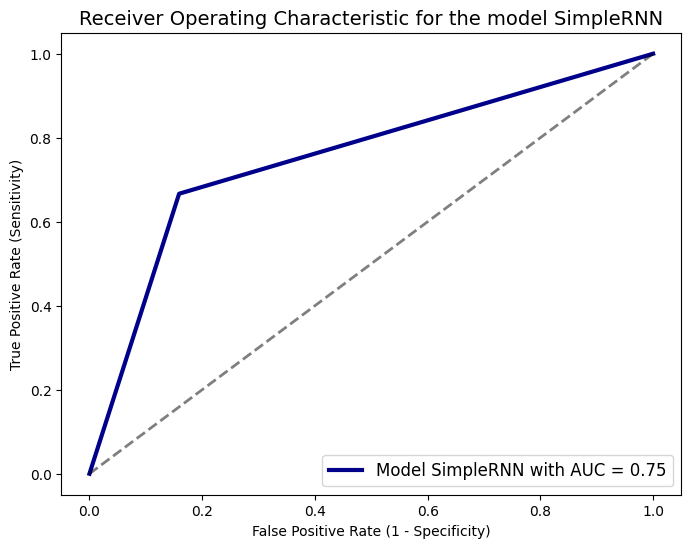

2/2 [==============================] - 2s 6ms/step
Confusion matrix of the model LSTM : 
[[39  5]
 [10  8]]
True Negative of the model LSTM -> 39
False Positive of the model LSTM -> 5
False Negative of the model LSTM -> 10
True Positive of the model LSTM -> 8
Accuracy of the model LSTM -> 0.7580645161290323
Misclassification rate of the model LSTM -> 0.24193548387096775
Precision of the model LSTM -> 0.6153846153846154
Recall of the model LSTM -> 0.4444444444444444
F1 Measure of the model LSTM -> 0.5161290322580646
AUC of the model LSTM -> 0.6654040404040404




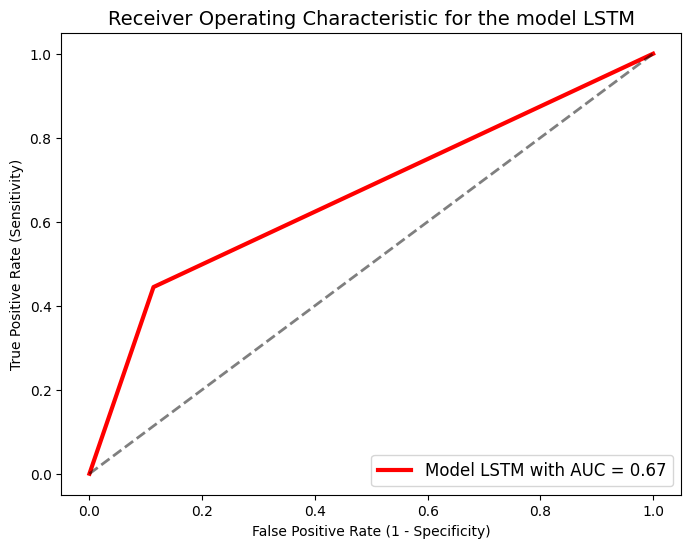

2/2 [==============================] - 2s 11ms/step
Confusion matrix of the model GRU : 
[[40  4]
 [ 9  9]]
True Negative of the model GRU -> 40
False Positive of the model GRU -> 4
False Negative of the model GRU -> 9
True Positive of the model GRU -> 9
Accuracy of the model GRU -> 0.7903225806451613
Misclassification rate of the model GRU -> 0.20967741935483875
Precision of the model GRU -> 0.6923076923076923
Recall of the model GRU -> 0.5
F1 Measure of the model GRU -> 0.5806451612903226
AUC of the model GRU -> 0.7045454545454545




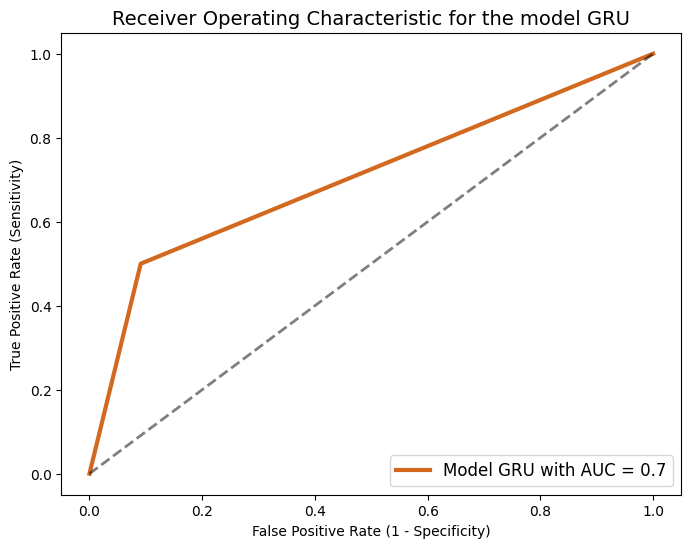

In [37]:
model_names = ml_names + em_names + dl_names
legend_names = lml_names + lem_names + ldl_names
colors_names = cml_names + cem_names + cdl_names

def eval_function_with_roc_plot():
    ml_curves = []
    em_curves = []
    dl_curves = []
    
    for model in model_names:
        name = legend_names[model_names.index(model)]
        
        if name == "SVM":
            model_prediction = eval(f"model_{model}.predict(test_data)")
            model_proba = eval(f"model_{model}.decision_function(test_data)")
        elif name == "Bagging":
            model_proba = np.round(eval(f"model_{model}"))
            model_prediction = model_proba
        elif name == "Voting Hard":
            model_prediction = eval(f"model_{model}.predict(test_data)")
            model_proba = model_prediction
        elif name == "Blending":
            model_predictions = eval(f"model_{model}.predict(meta_predictions)")
            model_proba = eval(f"model_{model}.predict_proba(meta_predictions)[:, 1] ")
        elif name == "ANN":
            model_proba = eval(f"model_{model}.predict(test_features.reshape(test_features.shape[0], -1))")
            model_proba = np.where(model_proba> 0.5, 1, 0)
            model_prediction = model_proba
        elif name == "SimpleRNN" or name == "LSTM" or name == "GRU":
            model_proba = eval(f"model_{model}.predict(test_features)")
            model_proba = np.where(model_proba> 0.5, 1, 0)
            model_prediction = model_proba
        else:
            model_prediction = eval(f"model_{model}.predict(test_data)")
            model_proba = eval(f"model_{model}.predict_proba(test_data)[:, 1] ")
        
        model_cm = confusion_matrix(test_labels, model_prediction)    
        tn, fp, fn, tp = model_cm.ravel()
        
        model_accuracy = accuracy_score(test_labels, model_prediction)
        model_misclassification = 1 - accuracy_score(test_labels, model_prediction)
        model_precision = precision_score(test_labels, model_prediction)
        model_recall = recall_score(test_labels, model_prediction)
        model_f1 = f1_score(test_labels, model_prediction)
        
        model_fpr, model_tpr, model_thresholds = roc_curve(test_labels, model_proba)
        model_auc = auc(model_fpr, model_tpr)

        print(f"Confusion matrix of the model {name} : \n{model_cm}")
        print(f'True Negative of the model {name} -> {tn}')
        print(f'False Positive of the model {name} -> {fp}')
        print(f'False Negative of the model {name} -> {fn}')
        print(f'True Positive of the model {name} -> {tp}')
        print(f"Accuracy of the model {name} -> {model_accuracy}")
        print(f"Misclassification rate of the model {name} -> {model_misclassification}")
        print(f"Precision of the model {name} -> {model_precision}")
        print(f"Recall of the model {name} -> {model_recall}")
        print(f"F1 Measure of the model {name} -> {model_f1}")
        print(f"AUC of the model {name} -> {model_auc}")
        print("\n")

        plt.figure(figsize=(8, 6))
        roc = "plt.plot(model_fpr, model_tpr, color=colors_names[model_names.index(model)], lw=3, label=f'Model {name} with AUC = {round(model_auc, 2)}' % model_auc)"
        eval(f"{roc}")
        plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2, alpha=0.5)

        # Customize legend position
        plt.legend(loc = 'lower right', fontsize=12)

        # Add labels and title
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.title(f'Receiver Operating Characteristic for the model {name}', fontsize=14)
        plt.show()
        
        if name in lml_names:
            ml_curves.append([model_fpr, model_tpr, colors_names[model_names.index(model)], name, model_auc])
        elif name in lem_names:
            em_curves.append([model_fpr, model_tpr, colors_names[model_names.index(model)], name, model_auc])
        elif name in ldl_names:
            dl_curves.append([model_fpr, model_tpr, colors_names[model_names.index(model)], name, model_auc])
            
    return ml_curves, em_curves, dl_curves

    
ml_c, em_c, dl_c = eval_function_with_roc_plot()
print("\n")

# ROC-AUC Curve [Combined]

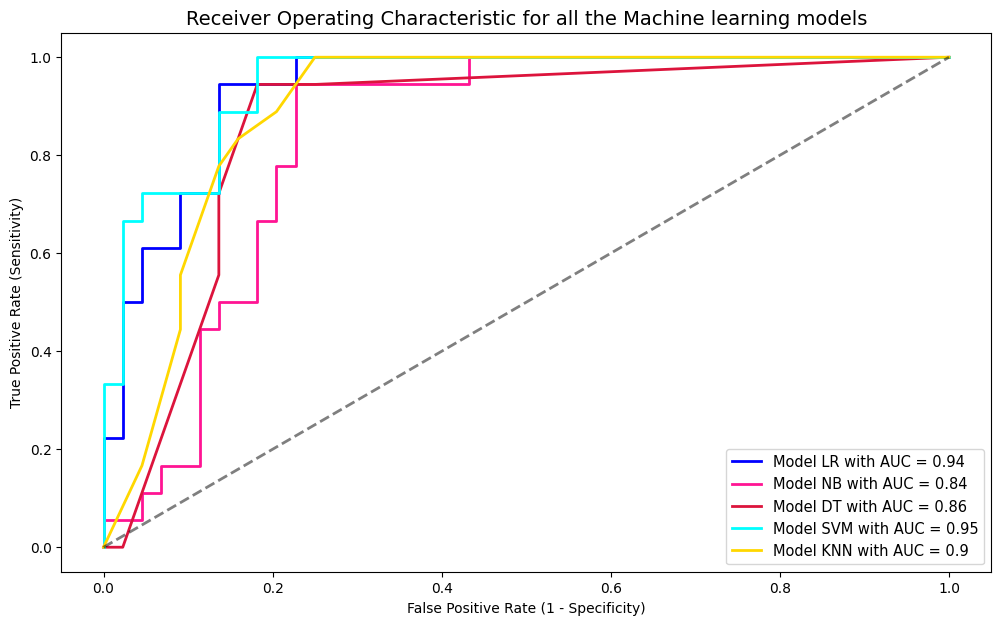

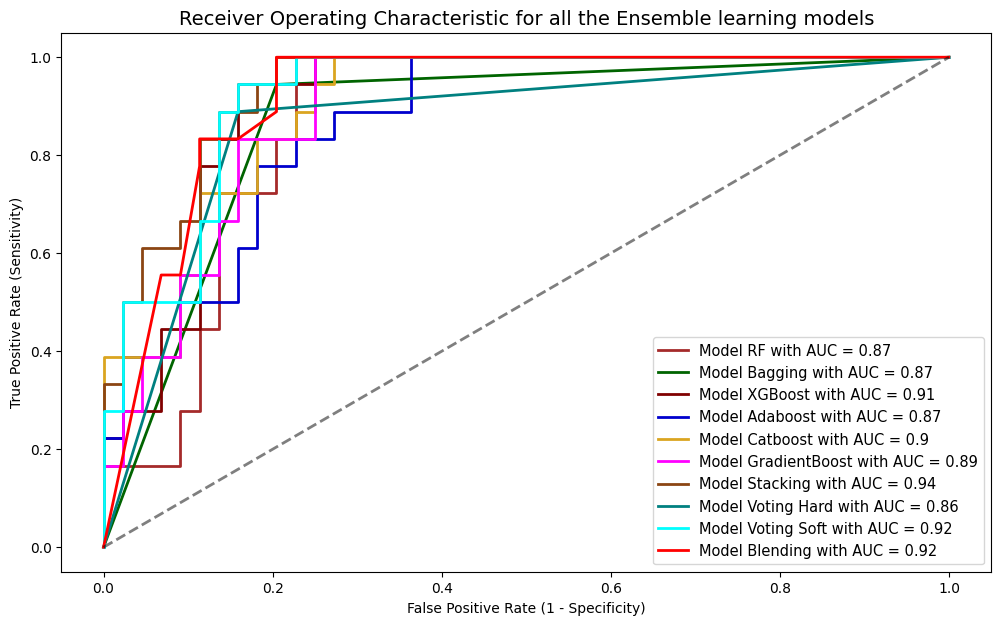

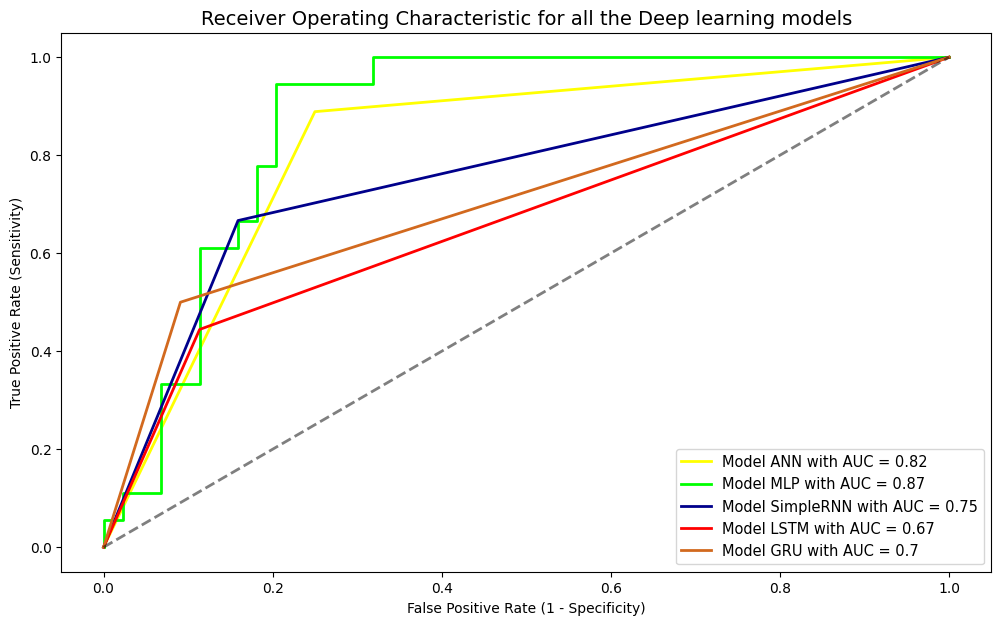

In [38]:
roc_curves = [ml_c, em_c, dl_c]
names = ["Machine", "Ensemble", "Deep"]

for i in range(len(roc_curves)):
    plt.figure(figsize=(12, 7))
    for j in range(len(roc_curves[i])):
        plt.plot(roc_curves[i][j][0], roc_curves[i][j][1], color=roc_curves[i][j][2], lw=2, label=f'Model {roc_curves[i][j][3]} with AUC = {round(roc_curves[i][j][4], 2)}')

    plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2, alpha=0.5)

    # Customize legend position
    plt.legend(loc = 'lower right', fontsize=10.5)

    # Add labels and title
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title(f'Receiver Operating Characteristic for all the {names[i]} learning models', fontsize=14)

    # Show the plot
    plt.show()

### ROC-AUC Curve [ALL in ONE]